## Abstraction and Reasoning Challenge
Create an AI capable of solving reasoning tasks it has never seen before

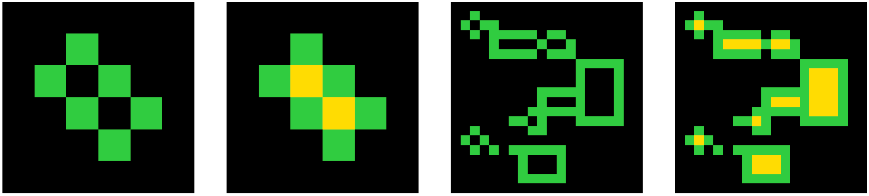

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
import os

In [ ]:
data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

training_tasks = sorted(os.listdir(training_path))

In [ ]:
cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
    
def plot_example(example, ax1, ax2, name):
    ax1.imshow(example['input'], cmap=cmap, norm=norm)
    ax1.axis('off')
    w = len(example['input'])
    h = len(example['input'][0])
    ax1.set_title(f'{name} input {w}x{h}')
    ax2.imshow(example['output'], cmap=cmap, norm=norm)
    ax2.axis('off')
    w = len(example['output'])
    h = len(example['output'][0])
    ax2.set_title(f'{name} output {w}x{h}')

def plot_task(task, name):
    """
    Plots all train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    n_plots = 2 * (len(task['train']) + len(task['test']))
    fig, axs = plt.subplots(int(np.ceil(n_plots / 4)), 4, figsize=(15,15))
    axs = sum(map(list, axs), [])
    for i, train_example in enumerate(task['train']):
        plot_example(train_example, axs[2 * i], axs[2 * i + 1], f'{name} train[{i}]')
    offset = 2 * len(task['train']) 
    for i, test_example in enumerate(task['test']):
        plot_example(test_example, axs[offset + 2 * i], axs[offset + 2 * i + 1], f'{name} test[{i}]')
    offset += 2 * len(task['test'])
    for ax in axs[offset:]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(len(training_tasks)):
    task_file = str(training_path / training_tasks[i])
    with open(task_file, 'r') as f:
        task = json.load(f)
    plot_task(task, f'Task {i}')